In [1]:
!pip install tensorflow matplotlib flask numpy pandas seaborn


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10


** Load and Explore the Dataset**

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Dataset description
num_classes = 10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')


170498071/170498071 [==============================] - 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


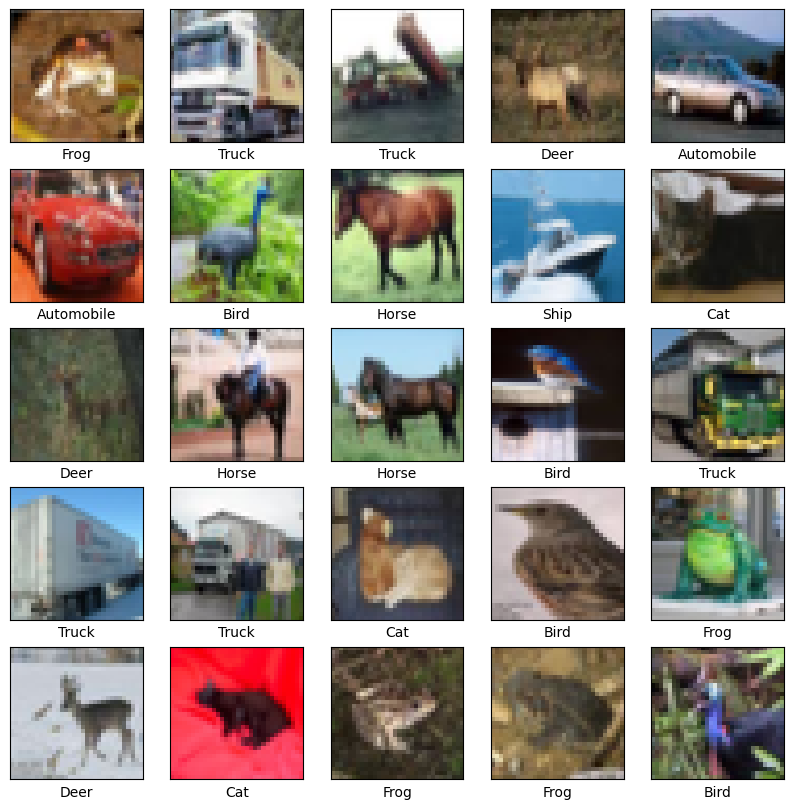

In [5]:
# Visualizing some images:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


**Visualizing the distribution of classes:**

<ipython-input-7-a1b5224c204e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train_labels_flat, palette="Set2")


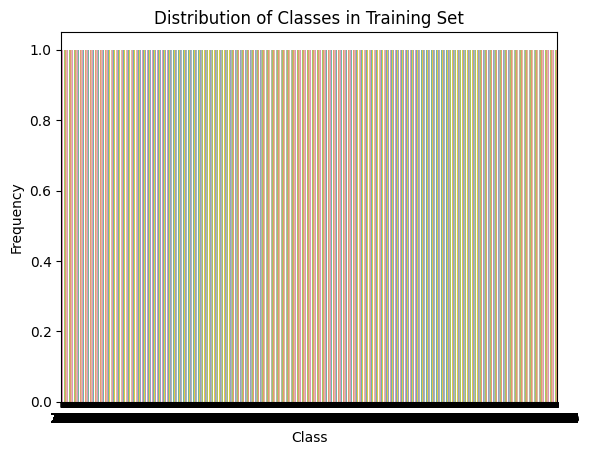

In [7]:
train_labels_flat = train_labels.flatten()
sns.countplot(train_labels_flat, palette="Set2")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in Training Set')
plt.show()


**Data Pre-processing:**

In [8]:
# Normalizing the images:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [9]:
#  Data Augmentation:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator
datagen.fit(train_images)


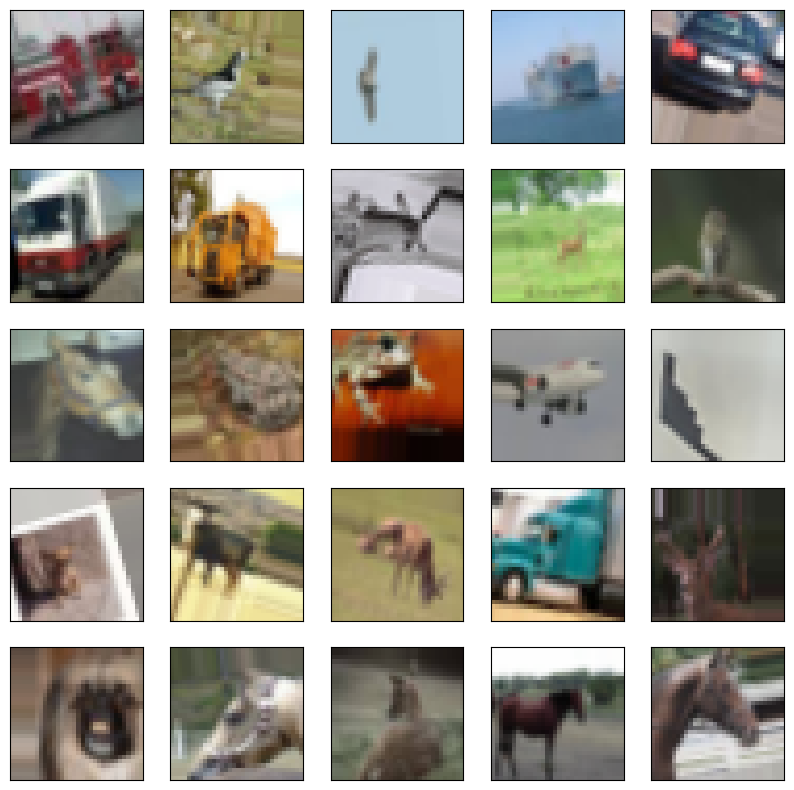

In [10]:
# Displaying augmented images:
# Show some augmented images
plt.figure(figsize=(10, 10))
for images, _ in datagen.flow(train_images, train_labels, batch_size=25):
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
    break
plt.show()


**Build the Baseline Model**

In [11]:
from tensorflow.keras import layers, models

# Build the baseline model
baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Model summary
baseline_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Compile the Model**

In [12]:
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [13]:
# Train the Model
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(train_images)

# Train the model
history_baseline = baseline_model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                                      epochs=10,
                                      validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 99s 124ms/step - loss: 1.7952 - accuracy: 0.1063 - val_loss: 1.5305 - val_accuracy: 0.0892
Epoch 2/10
782/782 [==============================] - 96s 123ms/step - loss: 1.5362 - accuracy: 0.0935 - val_loss: 1.3706 - val_accuracy: 0.0702
Epoch 3/10
782/782 [==============================] - 98s 126ms/step - loss: 1.4243 - accuracy: 0.0914 - val_loss: 1.3335 - val_accuracy: 0.0786
Epoch 4/10
782/782 [==============================] - 99s 126ms/step - loss: 1.3491 - accuracy: 0.0926 - val_loss: 1.1372 - val_accuracy: 0.0763
Epoch 5/10
782/782 [==============================] - 106s 135ms/step - loss: 1.2964 - accuracy: 0.0934 - val_loss: 1.1514 - val_accuracy: 0.0804
Epoch 6/10
782/782 [==============================] - 103s 132ms/step - loss: 1.2566 - accuracy: 0.0940 - val_loss: 1.1188 - val_accuracy: 0.0967
Epoch 7/10
782/782 [==============================] - 104s 133ms/step - loss: 1.2179 - accuracy: 0.0948 - val_loss: 1.0856 - val

In [14]:
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(test_images, test_labels)
print(f'Test accuracy of the baseline model: {baseline_test_acc}')


313/313 [==============================] - 5s 17ms/step - loss: 1.0004 - accuracy: 0.1116
Test accuracy of the baseline model: 0.11159999668598175


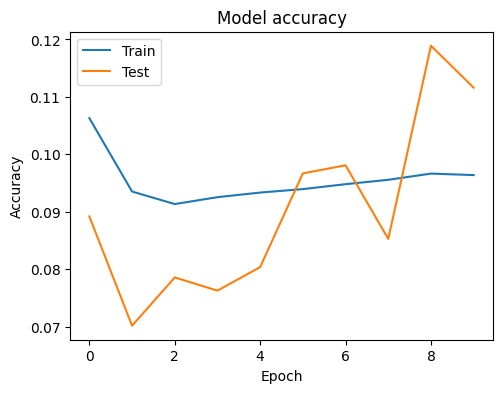

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'])
plt.plot(history_baseline.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

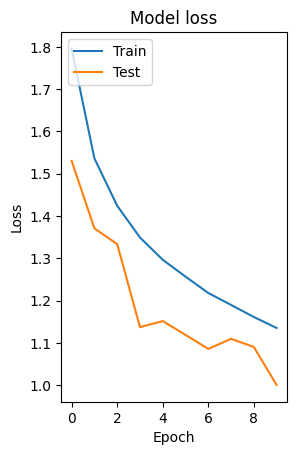

In [16]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'])
plt.plot(history_baseline.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

**Transfer Learning**

In [17]:
# Select a Pre-trained Model
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
base_model.trainable = False

# Display the architecture of the base model
base_model.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [18]:
# Add Custom Layers on Top of the Pre-trained Model
from tensorflow.keras import layers, models

# Create a new model with the VGG16 base model and additional custom layers
transfer_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Display the architecture of the transfer learning model
transfer_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [19]:
# Compile the Transfer Learning Model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [24]:

# Train the transfer learning model
history_transfer = transfer_model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                                      epochs=1,
                                      validation_data=(test_images, test_labels))


782/782 [==============================] - 5035s 6s/step - loss: 1.0006 - accuracy: 0.0976 - val_loss: 0.8245 - val_accuracy: 0.0936


In [26]:
# Fine-tune the Pre-trained Model
# Unfreeze the top layers of the pre-trained model
base_model.trainable = True

# Freeze all the layers up to a specific layer
fine_tune_at = 15  # Unfreeze from this layer onwards
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after making changes
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = transfer_model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                                       epochs=1,
                                       validation_data=(test_images, test_labels))


782/782 [==============================] - 2908s 4s/step - loss: 0.8345 - accuracy: 0.1000 - val_loss: 0.7275 - val_accuracy: 0.0988


In [30]:
transfer_test_loss, transfer_test_acc = transfer_model.evaluate(test_images, test_labels)
print(f'Test accuracy of the transfer learning model: {transfer_test_acc}')


313/313 [==============================] - 130s 417ms/step - loss: 0.7275 - accuracy: 0.0988
Test accuracy of the transfer learning model: 0.09880000352859497


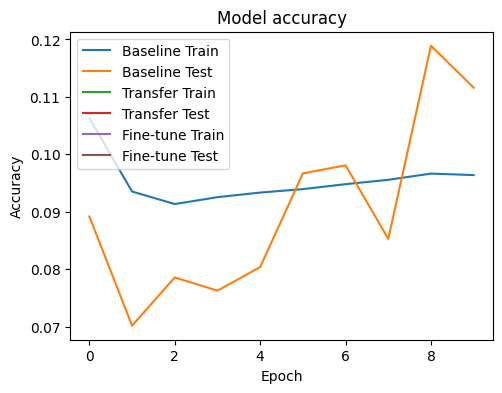

In [31]:
# Plot training & validation accuracy values for both models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'], label='Baseline Train')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Test')
plt.plot(history_transfer.history['accuracy'], label='Transfer Train')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Test')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tune Train')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-tune Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

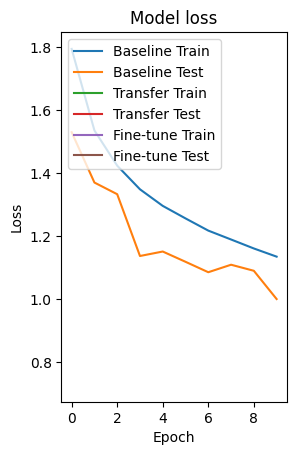

In [32]:
# Plot training & validation loss values for both models
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'], label='Baseline Train')
plt.plot(history_baseline.history['val_loss'], label='Baseline Test')
plt.plot(history_transfer.history['loss'], label='Transfer Train')
plt.plot(history_transfer.history['val_loss'], label='Transfer Test')
plt.plot(history_fine_tune.history['loss'], label='Fine-tune Train')
plt.plot(history_fine_tune.history['val_loss'], label='Fine-tune Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

**Save the Trained Model**



>model depployment
**bold text**


In [33]:
# Save the fine-tuned model
transfer_model.save('image_classification_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
from flask import Blueprint, render_template, request, redirect, url_for
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

bp = Blueprint('app', __name__)

# Load the trained model
model = load_model('image_classification_model.h5')
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def predict_image(image_path):
    img = load_img(image_path, target_size=(32, 32))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

@bp.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        if 'file' not in request.files:
            return redirect(request.url)
        file = request.files['file']
        if file.filename == '':
            return redirect(request.url)
        if file:
            filename = file.filename
            file_path = os.path.join('app/static', filename)
            file.save(file_path)
            predicted_class = predict_image(file_path)
            return render_template('result.html', class_name=predicted_class, image_file=filename)
    return render_template('index.html')
